#**Laboratorio 1 - Regrsesión Lineal Múltiple**

Resumen del Problema

Las empresas inmobiliarias en línea ofrecen valoraciones de casas utilizando técnicas de aprendizaje automático. El objetivo de este informe es predecir las ventas de casas en el Condado de King, Estado de Washington, EE.UU., utilizando Regresión Lineal Múltiple (MLR). El conjunto de datos consistió en datos históricos de casas vendidas entre Mayo de 2014 y Mayo de 2015.

Desafortunadamente, el usuario no ha indicado la fuente de los datos. Encuentre la cita y la descripción de la base de datos en el Glosario y la Bibliografía.
El conjunto de datos consistió en 21 variables y 21613 observaciones.
Debido a la variable “Grade” que se basa en un sistema de calificación específico del Condado de King, parece probable que los datos se originaron en una fuente oficial. Por otro lado, la existencia de la variable “View” se relaciona con el número de visitas que recibió la propiedad. Esto sugiere que los datos se originaron de un agente/empresa de bienes raíces.
En cualquier caso, no hay razón para cuestionar la precisión general de los datos porque valores como precios, área, etc., no parecen aleatorios. Sin embargo, es apropiada cierta precaución antes de aplicar modelos entrenados en estos datos a casos más generales.

id:
  - Descripción: Identificador único para cada casa.
  - Tipo de dato: Numérico.

fecha:
  - Descripción: Fecha en que se vendió la casa.
  - Tipo de dato: String (texto).

precio:
  - Descripción: Precio de venta de la casa. Este es el valor que queremos predecir.
  - Tipo de dato: Numérico.

dormitorios:
  - Descripción: Número de habitaciones en la casa.
  - Tipo de dato: Numérico.

baños:
  - Descripción: Número de baños en la casa.
  - Tipo de dato: Numérico.

sqft_living:
  - Descripción: Pies cuadrados de área habitable en la casa.
  - Tipo de dato: Numérico.

sqft_lot:
  - Descripción: Pies cuadrados del terreno.
  - Tipo de dato: Numérico.

pisos:
  - Descripción: Número de pisos (niveles) en la casa.
  - Tipo de dato: Numérico.

casa_frente_al_mar:
  - Descripción: Indica si la casa tiene vista al mar (1 = sí, 0 = no).
  - Tipo de dato: Numérico.

vista:
  - Descripción: Número de veces que la casa ha sido vista por posibles compradores.
  - Tipo de dato: Numérico.

condición:
  - Descripción: Calificación de la condición general de la casa.
    - 1: Propiedad en mal estado.
    - 5: Propiedad en excelente estado.
  - Tipo de dato: Numérico.

grado:
  - Descripción: Calificación general de la casa según el sistema de clasificación del Condado de King.
    - 1: Pobre.
    - 13: Excelente.
  - Tipo de dato: Numérico.

sqft_above:
  - Descripción: Pies cuadrados de la casa, excluyendo el sótano.
  - Tipo de dato: Numérico.

sqft_basement:
  - Descripción: Pies cuadrados del sótano.
  - Tipo de dato: Numérico.

yr_built:
  - Descripción: Año en que se construyó la casa.
  - Tipo de dato: Numérico.

yr_renovated:
  - Descripción: Año en que la casa fue renovada (0 si no ha sido renovada).
  - Tipo de dato: Numérico.

zipcode:
  - Descripción: Código postal de la ubicación de la casa.
  - Tipo de dato: Numérico.

latitud:
  - Descripción: Coordenada de latitud de la ubicación de la casa.
  - Tipo de dato: Numérico.

longitud:
  - Descripción: Coordenada de longitud de la ubicación de la casa.
  - Tipo de dato: Numérico.

sqft_living15:
  - Descripción: Pies cuadrados de área habitable en 2015 (puede incluir renovaciones).
  - Tipo de dato: Numérico.

sqft_lot15:
  - Descripción: Pies cuadrados del terreno en 2015 (puede incluir renovaciones).
  - Tipo de dato: Numérico.

Lectura de datos del archivo lab01.csv desde google drive usando la libreria pandas

In [14]:
# Lab01- Grupo 4
# Baldiviezo Cruz Dereck Fernando
# Duran Condori Eid Darwin
# Maturano Zárate Félix
# Ojeda Crispin Leandra Soraya
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/datasets/lab01.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Asignacion de variables

In [15]:
#Eliminamos columnas no relevantes

#data.drop(columns=['id', 'date', 'zipcode'], inplace=True)
data.drop(columns=['id', 'date', 'waterfront', 'view', 'yr_renovated'], inplace=True)

sqft_living = data['sqft_living'].values  # Tamaño de la casa en pies cuadrados
price = data['price'].values


X = data.drop(columns=['price']).values
y = data['price'].values
m = y.size
print(X)

[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]


Trazar los datos

In [16]:
def plotData(x, y):
    fig = pyplot.figure()

    # Grafica los datos
    pyplot.plot(x, y, 'ro', ms=10, mec='k')  # 'ro' = puntos rojos, 'ms' = tamaño del marcador, 'mec' = color del borde
    pyplot.ylabel('Precio de la casa en dólares')  # Etiqueta del eje Y
    pyplot.xlabel('Tamaño de la casa en pies cuadrados')  # Etiqueta del eje X
    pyplot.title('Precio de la casa vs. Tamaño de la casa')  # Título del gráfico
    pyplot.grid(True)  # Agrega una cuadrícula al gráfico
    #pyplot.show()  # Muestra el gráfico

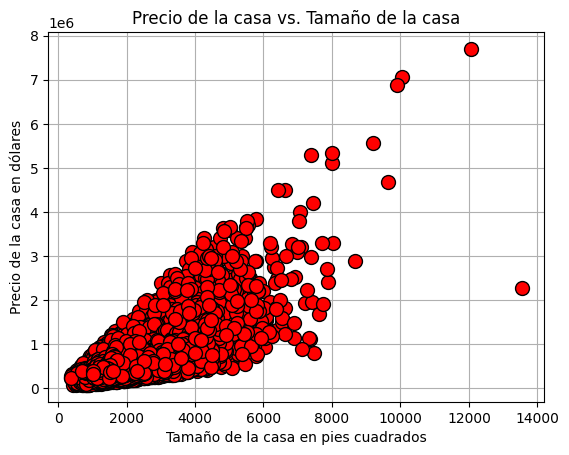

In [17]:
plotData(sqft_living, price)

Normalizacion de Caracteristicas

In [18]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1]) #Crea una matriz de 0's del tamaño de las columnas (X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [19]:
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

print('X normalizada: ',X_norm)

Media calculada: [ 3.37319998e+00  2.11582627e+00  2.08032185e+03  1.50994088e+04
  1.49409640e+00  3.40982544e+00  7.65791545e+00  1.78859684e+03
  2.91725008e+02  1.97099968e+03  9.80779518e+04  4.75600930e+01
 -1.22213982e+02  1.98662032e+03  1.27582835e+04]
Desviación estandar calculada: [9.26277449e-01 7.68966493e-01 9.18084869e+02 4.14116781e+04
 5.39670296e-01 6.50530574e-01 1.17317250e+00 8.27740597e+02
 4.42657552e+02 2.93745540e+01 5.35118334e+01 1.38548560e-01
 1.40720271e-01 6.85214608e+02 2.72738105e+04]
X normalizada:  [[-0.40290302 -1.45107268 -0.98065209 ... -0.30569514 -0.94367562
  -0.26062671]
 [-0.40290302  0.17448579  0.53336915 ... -0.74628553 -0.43288674
  -0.18769961]
 [-1.48249316 -1.45107268 -1.4272339  ... -0.13514402  1.07029196
  -0.17219022]
 ...
 [-1.48249316 -1.77618438 -1.15492792 ... -0.6041596  -1.41068259
  -0.39419807]
 [-0.40290302  0.49959749 -0.52317805 ...  1.03028865 -0.84151784
  -0.42059702]
 [-1.48249316 -1.77618438 -1.15492792 ... -0.604159

Se añade el termino de interseccion a X

In [20]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X)

[[ 1.         -0.40290302 -1.45107268 ... -0.30569514 -0.94367562
  -0.26062671]
 [ 1.         -0.40290302  0.17448579 ... -0.74628553 -0.43288674
  -0.18769961]
 [ 1.         -1.48249316 -1.45107268 ... -0.13514402  1.07029196
  -0.17219022]
 ...
 [ 1.         -1.48249316 -1.77618438 ... -0.6041596  -1.41068259
  -0.39419807]
 [ 1.         -0.40290302  0.49959749 ...  1.03028865 -0.84151784
  -0.42059702]
 [ 1.         -1.48249316 -1.77618438 ... -0.6041596  -1.41068259
  -0.41803046]]


Funcion para calcular el costo J

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

In [21]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] #numero de ejemplos(filas)
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Funcion de descenso de gradiente utilizado para minimizar el costo J

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

In [22]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] #numero de ejemplos(filas)
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Inicializamos los parametros de ajuste

In [23]:
theta = np.zeros(16)
alpha = 0.003
num_iters = 4000

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

print(f'Theta encontrada: {theta}')

#print('Costo final: ',{J_history[-1]})



Theta encontrada: [540293.3131463  -42985.74781033  36008.07669796  86706.23469239
   6554.74355368   7335.32443122  17185.57575846 118246.38206192
  76050.1427786   37622.51764212 -88708.99061161 -25607.23520519
  76493.62407971 -35716.76686263  29234.21223298  -8903.06511595]


Tamaño de las casas en pies cuadrados, [1180. 2570.  770. ... 1020. 1600. 1020.]


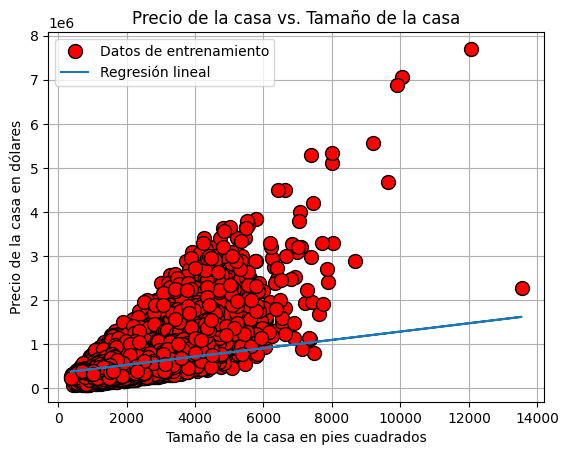

In [24]:
X_sin_unos = X[:, 1:]

# Desnormalizar X
X_original_sin_unos = X_sin_unos * sigma + mu  # Desnormalizar las columnas restantes

#Volver a agregar la columna de unos
X_original = np.concatenate([np.ones((X.shape[0], 1)), X_original_sin_unos], axis=1)
print('Tamaño de las casas en pies cuadrados,',X_original[:,3])
#Graficar datos
plotData(X_original[:, 3], y)
pyplot.plot(X_original[:, 3], theta[0] + X[:, 3] * theta[3],'-')
#pyplot.plot(X_original[:, 3], theta[0] + np.dot(X_original[:,3], theta[3]), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal']);

Prediccion con valores de prueba (normalizados)

[[ 1.          0.67668712  3.10049105  3.63765732  2.09676582 -0.91555234
  -0.62998644  2.848758    2.53872187  2.79736556  1.02130313 -0.46628649
   0.69294842  1.48509164  4.04746141  3.26949975]]
Predicción de precio para la casa de prueba: $1,580,147.11


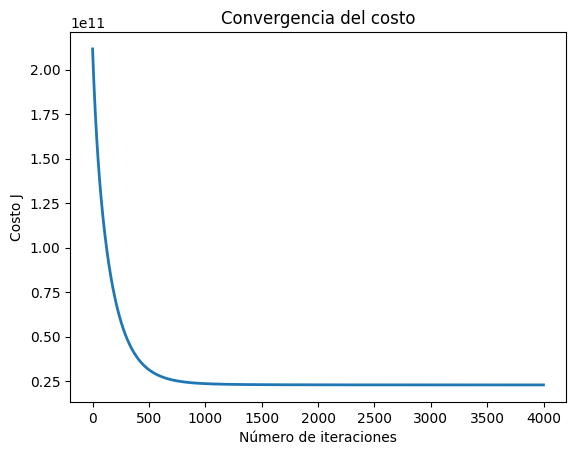

In [25]:
# Datos de prueba:
# 4 habitaciones
# 4.5 baños
# 5420 pies cuadrados de área habitable
# 101930 pies cuadrados de terreno
# 1 piso
# Condición 3
# Grado 11
# 3890 pies cuadrados de área sobre el suelo
# 1530 pies cuadrados de sótano
# Año de construcción 2001
# Código postal 98053
# Latitud 47.6561
# Longitud -122.005
# 4760 pies cuadrados de área habitable en 2015
# 101930 pies cuadrados de terreno en 2015

test_input = np.array([[4, 4.5, 5420, 101930, 1, 3, 11, 3890, 1530, 2001, 98053, 47.6561, -122.005, 4760, 101930]])  # 15 características
#test_input = np.array([[3,2.25,2570,7242,2,3,7,2170,400,1951,98125,47.721,-122.319,1690,7639]])  # 15 características

test_input = (test_input - mu) / sigma

test_input = np.concatenate([np.ones((test_input.shape[0], 1)), test_input], axis=1)
print(test_input)
predicted_price = np.dot(test_input, theta)
print(f'Predicción de precio para la casa de prueba: ${predicted_price[0]:,.2f}')

# Gráfica de convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo')
pyplot.show()

Theta encontrada (regresión polinómica): [540293.3131463   96459.85221607 174709.28572903]


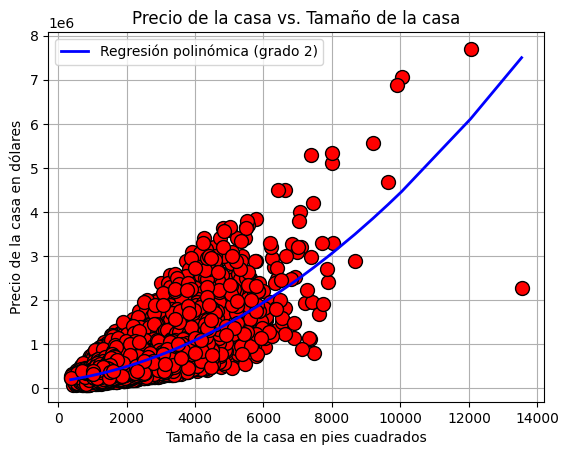

In [26]:
sqft_living = X_original[:, 3]

X_poly = np.column_stack((sqft_living, sqft_living ** 2)) # creamos X_poly de grado 2

X_poly_norm, mu_poly, sigma_poly = featureNormalize(X_poly) #normalizamos

X_poly_norm = np.concatenate([np.ones((X_poly_norm.shape[0], 1)), X_poly_norm], axis=1) #Añadimos columna de unos

theta_poly = np.zeros(3)

alpha = 0.003
num_iters = 4000

theta_poly, J_history = gradientDescentMulti(X_poly_norm, y, theta_poly, alpha, num_iters) #Usamos gradientDescentMulti

print(f'Theta encontrada (regresión polinómica): {theta_poly}')

#Ordenar los datos para graficar
indices_ordenados = np.argsort(sqft_living)
sqft_living_ordenado = sqft_living[indices_ordenados]
y_ordenado = y[indices_ordenados]

X_poly_ordenado = np.column_stack((sqft_living_ordenado, sqft_living_ordenado ** 2))

X_poly_ordenado_norm = (X_poly_ordenado - mu_poly) / sigma_poly

X_poly_ordenado_norm = np.concatenate([np.ones((X_poly_ordenado_norm.shape[0], 1)), X_poly_ordenado_norm], axis=1)

y_pred_poly = np.dot(X_poly_ordenado_norm, theta_poly)
plotData(sqft_living, y)

pyplot.plot(sqft_living_ordenado, y_pred_poly, '-', color='blue', linewidth=2, label='Regresión polinómica (grado 2)')

pyplot.legend()
pyplot.show()

Ecuacion de la Normal


In [27]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/datasets/lab01.csv')

data.drop(columns=['id', 'date', 'waterfront', 'view', 'yr_renovated'], inplace=True)

sqft_living = data['sqft_living'].values  # Tamaño de la casa en pies cuadrados
price = data['price'].values


X = data.drop(columns=['price']).values
y = data['price'].values
m = y.size
print(X)

[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]


In [28]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [29]:
theta = normalEqn(X, y);

print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

X_array = [4, 4.5, 5420, 101930, 1, 3, 11, 3890, 1530, 2001, 98053, 47.6561, -122.005, 4760, 101930]
price = np.dot(X_array, theta)

print('Precio predecido para la casa de prueba: ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-4.07728210e+06 -7.63944737e+06  8.40631427e+05  8.26137626e-01
  6.93131875e+06  2.61366327e+06 -5.24368314e+05 -8.32527828e+05
 -8.32125948e+05 -3.09690425e+03 -5.20397973e+02  5.50726953e+05
 -2.47040810e+05  3.75329384e+01 -3.27716896e-01]
Precio predecido para la casa de prueba: $2245684
